https://vgpena.github.io/classifying-tweets-with-keras-and-tensorflow/

En el anterior enlace, tenéis un ejemplo sobre cómo, a partir de tweets con un label específico (un sentimiento, positivo o negativo): 

1. Genera un conjunto de entrenamiento. El conjunto de entrenamiento es formado a partir de tweets completos pasados a un array con un tamaño específico.
2. Ese array (X_train de tamaño N) tiene un label que representa el sentimiento (y_train)
3. Como todas las frases tienen un tamaño N, la entrada de la red neuronal será de tamaño N y la salida de la red será de tamaño 2 usando activación softmax(porque hay dos clases).

Se pide: 

- Realizar un clasificador de reviews para el dataset de IMDB de la carpeta data_exercise/

**Cuando usa la importación "keras.x", reemplázalo por "tensorflow.keras.x"**

In [45]:
# Your code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from tensorflow import keras
import tensorflow.keras.preprocessing.text as kpt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [24]:
training = pd.read_csv("IMDB Dataset.csv")

In [25]:
X_train = training["review"]

y_train = training["sentiment"]

In [26]:
y_train.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [27]:
y_train = y_train.apply(lambda x: 1 if x == "positive" else 0)

In [28]:
y_train.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [29]:
y_train = np.asarray(y_train)

In [30]:
max_words = 3000
tokenizer = Tokenizer(num_words=max_words)

#tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [31]:
dictionary = tokenizer.word_index

with open('dictionary.json', 'w') as dictionary_file:
    json.dump(dictionary, dictionary_file)

In [32]:
def convert_text_to_index_array(text):
    return [dictionary[word] for word in kpt.text_to_word_sequence(text)]

In [33]:
allWordIndices = []

for text in X_train:
    wordIndices = convert_text_to_index_array(text)
    allWordIndices.append(wordIndices)

In [34]:
allWordIndices = np.asarray(allWordIndices)

train_x = tokenizer.sequences_to_matrix(allWordIndices, mode='binary')

In [35]:
train_y = keras.utils.to_categorical(y_train, 2)

In [36]:
model = Sequential()
model.add(Dense(512, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [47]:
model.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics= ["CategoricalAccuracy"])

In [48]:
hist_model = model.fit(train_x, train_y,
  batch_size=32,
  epochs=5,
  verbose=1,
  validation_split=0.1,
  shuffle=True)

Epoch 1/5
1407/1407 [==============================] - 15s 11ms/step - loss: 0.0283 - categorical_accuracy: 0.9909 - val_loss: 0.5088 - val_categorical_accuracy: 0.8812
Epoch 2/5
1407/1407 [==============================] - 15s 11ms/step - loss: 0.0204 - categorical_accuracy: 0.9931 - val_loss: 0.6161 - val_categorical_accuracy: 0.8810
Epoch 3/5
1407/1407 [==============================] - 15s 11ms/step - loss: 0.0187 - categorical_accuracy: 0.9938 - val_loss: 0.6109 - val_categorical_accuracy: 0.8812
Epoch 4/5
1407/1407 [==============================] - 15s 11ms/step - loss: 0.0175 - categorical_accuracy: 0.9939 - val_loss: 0.5909 - val_categorical_accuracy: 0.8814
Epoch 5/5
1407/1407 [==============================] - 15s 11ms/step - loss: 0.0161 - categorical_accuracy: 0.9946 - val_loss: 0.6370 - val_categorical_accuracy: 0.8794


In [49]:
hist_model.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

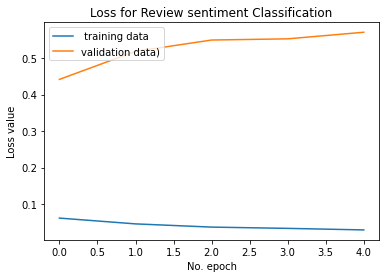

In [46]:
plt.plot(hist_model.history['loss'], label=' training data')
plt.plot(hist_model.history['val_loss'], label='validation data)')
plt.title('Loss for Review sentiment Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

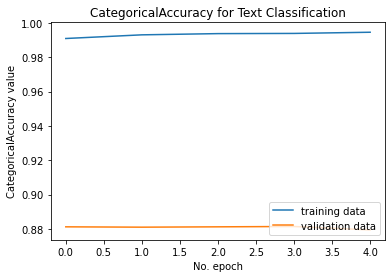

In [51]:
plt.plot(hist_model.history['categorical_accuracy'], label='training data')
plt.plot(hist_model.history['val_categorical_accuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

In [53]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('model.h5')